## PyGlaucoMetrics: An open-source Python repository that standardizes and assesses Visual Field (VF) data. Our repository automatically identifies signs of glaucoma based on predefined criteria.

# General overview:
# 1- Import raw VF data
df_VFs = pd.read_csv('VF_Data.csv')
# 2- Get td, tdp, pd, and pdp from PyVisualField Package. 
df_td, df_tdp, df_pdp = visualFields.getallvalues(df_VFs) 
# 3- Obtain required columns from each dataframe
raw_data_pdp = df_pdp.loc[:, 'l1':'l54']
raw_data_td = df_td.loc[:, 'l1':'l54']
raw_data_tdp = df_tdp.loc[:, 'l1':'l54']
# 4- CAll each function and save resulted diagnosis 
df_diag_HAP2 = Fn_HAP2_part2(raw_data_pdp) # it needs pdp values. will compute if necessary
df_diag_UKG = Fn_UKGTS(raw_data_td) #it needs tdp values, will compute if necessary
df_diag_logts = Fn_LoGTS(raw_data_tdp) # it need TD values, will compute if necessary

In [74]:
# Import Libraries
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np
import pandas as pd
import seaborn as sns
from PyVisualFields import visualFields
from PyVisualFields import vfprogression

In [42]:
# Read original and restructured data
org_data = pd.read_csv('C:/Users/musa1/PyVisualField/VF_Data_org.csv', encoding='windows-1254')
m1 = pd.read_csv('C:/Users/musa1/PyVisualField/VF_Data_restructured.csv', encoding='windows-1254')

In [46]:
# Check restructured data to make sure the data is in correct format accepted by the PyVisualField package
# To see an example of accepted data format: https://github.com/Mousamoradi/PyGlaucoMetrics/blob/main/Accepted%20data%20format.png
m1['date'] = pd.to_datetime(m1['date'], errors='coerce')
m1['id'] = m1['id'].astype(np.int32)
m1['age'] = m1['age'].astype(np.int32)
restruc_data = m1.apply(lambda x: x.astype('int32') if x.dtype == 'float64' else x)
print(restruc_data,"Restructured Data")
print(restruc_data.dtypes)

         id eye       date     time  age type  fpr  fnr  fl duration  ...  \
0       647  OD 2008-08-13  0:00:00   53  pwg    0    0   0  0:00:00  ...   
1       647  OD 2008-08-13  0:00:00   54  pwg    0    0   0  0:00:00  ...   
2       647  OD 2008-08-13  0:00:00   55  pwg    0    0   0  0:00:00  ...   
3       647  OD 2008-08-13  0:00:00   58  pwg    0    0   0  0:00:00  ...   
4       647  OD 2008-08-13  0:00:00   59  pwg    0    0   0  0:00:00  ...   
...     ...  ..        ...      ...  ...  ...  ...  ...  ..      ...  ...   
28938  7324  OS 2008-08-13  0:00:00   66  pwg    0    0   0  0:00:00  ...   
28939  6859  OD 2008-08-13  0:00:00   79  pwg    0    0   0  0:00:00  ...   
28940  6859  OD 2008-08-13  0:00:00   81  pwg    0    0   0  0:00:00  ...   
28941  1142  OS 2008-08-13  0:00:00   67  pwg    0    0   0  0:00:00  ...   
28942  1142  OS 2008-08-13  0:00:00   68  pwg    0    0   0  0:00:00  ...   

       l45  l46  l47  l48  l49  l50  l51  l52  l53  l54  
0       26   29  

## Obtaining TDP and PDP using PyVisualField Package. Please install approperiate packages/libraries as described at: (https://github.com/mohaEs/PyVisualField/blob/main/readme_Installation.md)

Shape of Total Deviation:(54,)
Type of Total Deviation: <class 'tuple'>


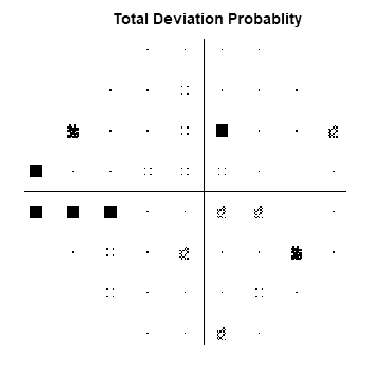

In [44]:
# Obtaining TDP and PDP using PyVisualField Package 
df_td, df_tdp, df_gi, df_gip, df_pd, df_pdp, gh = visualFields.getallvalues(restruc_data)#df_VFs_py data is acquired using 24-2 Vfs

ind_td_start=df_td.columns.get_loc("l1")
ind_td_end=df_td.columns.get_loc("l54") 

df_td = df_td.fillna(0)
df_tdp = df_tdp.fillna(0)

td = df_td.iloc[0,ind_td_start:ind_td_end+1].to_numpy().astype(np.int8())
print('Shape of Total Deviation:{}'.format(td.shape))
print('Type of Total Deviation:', type(td.shape))
tdp = df_tdp.iloc[0, ind_td_start:ind_td_end+1].to_numpy().astype(np.float16())
vfprogression.plotProbabilities(tdp, title= 'Total Deviation Probablity',
                                 save=True, filename='tdp', fmt='png') 

## vfplot: plots a single visual field test (from visualFields package)
Based on the input type, we can plot sensitivity(s), td, pd, tds (td & s), pds (pd & s)
deviations maps are colorful and the colormap can be accessed by plotProbColormap
Description: vfplot function also saves the photo with filename (e.g. 'file' in this example) with the format (e.g. 'png' in this example.).

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


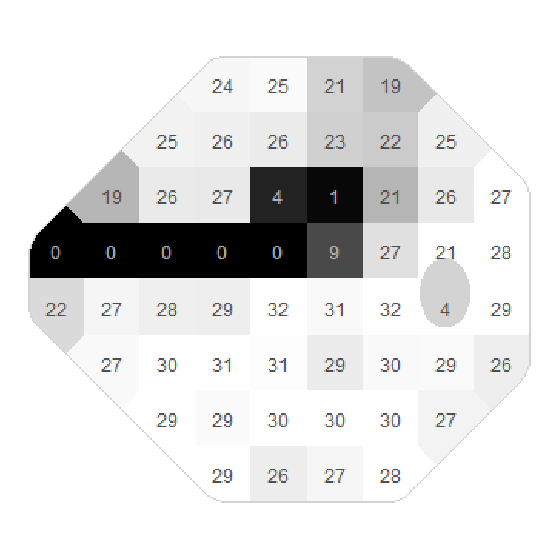

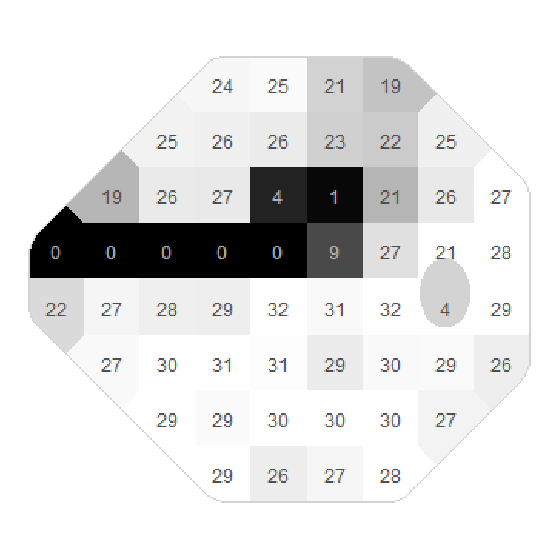

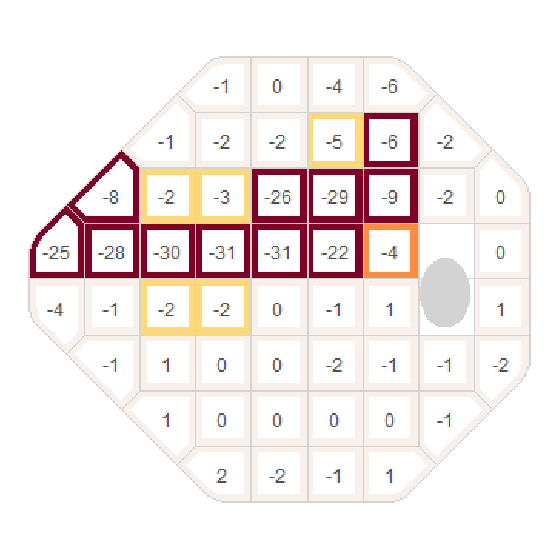

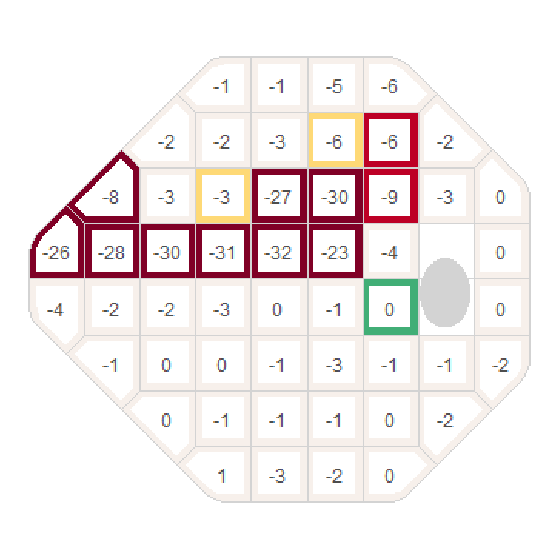

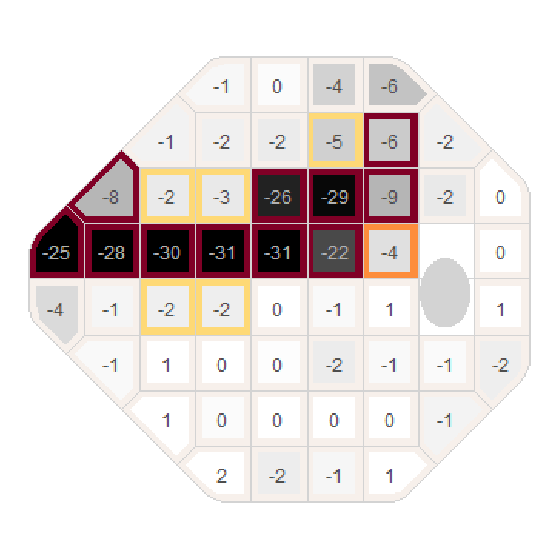

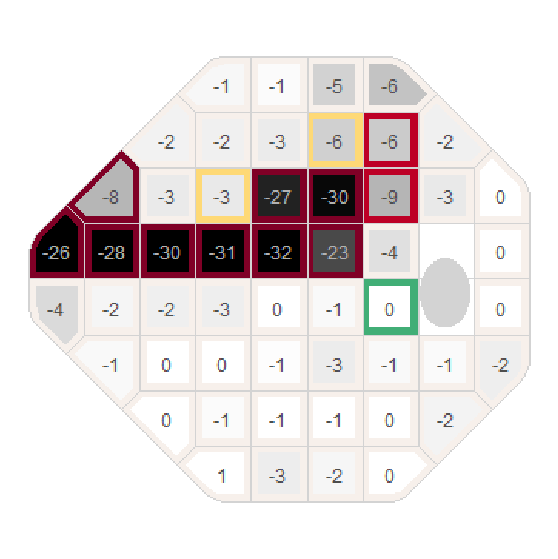

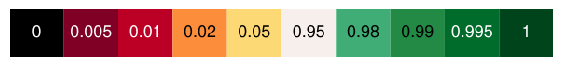

In [48]:
#df_VFs_py = visualFields.data_vfpwgRetest24d2() #df_VFs_py is acquired using vfpwgRetest24d2() function. 
df_VFs_py=restruc_data
vf = df_VFs_py.iloc[[28940]] #Sanity check...lets pick the first VF of df_VFs_py as example

visualFields.vfplot(vf, type='s', save=True, filename='file', fmt='png') # types: s, td,pd, tds, pds
visualFields.vfplot_s(vf, save=False, filename='s', fmt='png') # alias for vfplot(type='s')
visualFields.vfplot_td(vf, save=True, filename='td', fmt='png') # alias for vfplot(type='td')
visualFields.vfplot_pd(vf, save=True, filename='pd', fmt='pdf') # alias for vfplot(type='pd')
visualFields.vfplot_tds(vf, save=True, filename='tds', fmt='png') # alias for vfplot(type='tds')
visualFields.vfplot_pds(vf, save=True, filename='pds', fmt='png') # alias for vfplot(type='pds')
visualFields.plotProbColormap(save=True, filename='cmap', fmt='png') # show colormap of probablies (from visualFields package)

# 0- Data pre-processing: Filling out NaN values in a row with the median of that row

In [49]:
raw_data_pdp = df_pdp.loc[:, 'l1':'l54']
raw_data_td = df_td.loc[:, 'l1':'l54']
raw_data_tdp = df_tdp.loc[:, 'l1':'l54']
# Function to fill NaN values in a row with the median of that row
def fill_nan_with_median(row):
    median_value = row.median()
    return row.fillna(median_value)

# Apply the function to each row
proc_data_pdp = raw_data_pdp.apply(fill_nan_with_median, axis=1)
proc_data_td = raw_data_td.apply(fill_nan_with_median, axis=1)
proc_data_tdp = raw_data_tdp.apply(fill_nan_with_median, axis=1)

df_HAP2_p2 = proc_data_pdp
df_LoGTS = proc_data_td
df_UKGTS = proc_data_tdp

# Merge the DataFrames based on the common column 'ID'
df_HAP2_p2 = df_HAP2_p2.set_index(org_data.index)
df_HAP2_p2['MD'] = org_data['MTD'].values
# Filter the DataFrame for 'OD' eyes
df_HAP2_p2['eye'] = m1['eye'] 

# 1- HAP2-partII Criteria

In [51]:
def Fn_HAP2_part2(df_HAP2_p2):
  
    # Count the number of values less than 0.05 and 0.01 for each row
    count_05 = (df_HAP2_p2.loc[:, 'l1':'l54'] <= 0.05).sum(axis=1)
    count_01 = (df_HAP2_p2.loc[:, 'l1':'l54'] <= 0.01).sum(axis=1)
    
    # Add the count as new columns to the DataFrame
    df_HAP2_p2['Count_Less_Than_0.05'] = count_05
    df_HAP2_p2['Count_Less_Than_0.01'] = count_01

    # Define a function to apply the conditions and create the new column
    def stage_classification(row):
        if 0.01 <= abs(row['MD']) <= 6 and 1 <= row['Count_Less_Than_0.05'] <= 12 and 1 <= row['Count_Less_Than_0.01'] <= 4:
            return "Stage 1"
        elif 6.01 <= abs(row['MD']) <= 12 and 13 <= row['Count_Less_Than_0.05'] <= 26 and 5 <= row['Count_Less_Than_0.01'] <= 13:
            return "Stage 2"
        elif 12.01 <= abs(row['MD']) and row['Count_Less_Than_0.05'] >= 27 and row['Count_Less_Than_0.01'] >= 14:
            return "Stage 3"
        else:
            return "Non-GL"
    
    df_HAP2_p2['HAP2_p2_clf'] = df_HAP2_p2.apply(stage_classification, axis=1)
    
    return df_HAP2_p2

df_HAP2_p2 = Fn_HAP2_part2(df_HAP2_p2.copy())
df_HAP2_p2

,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,...,l50,l51,l52,l53,l54,MD,eye,Count_Less_Than_0.05,Count_Less_Than_0.01,HAP2_p2_clf
0,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-4.623269,OD,0,0,Non-GL
1,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-2.265192,OD,2,0,Non-GL
2,0.95,0.05,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-2.879615,OD,5,1,Stage 1
3,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.01,...,0.95,0.95,0.05,0.95,0.95,-4.220192,OD,8,2,Stage 1
4,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-4.464231,OD,6,2,Stage 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28938,0.95,0.95,0.95,0.95,0.050,0.005,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-4.234231,OS,6,3,Stage 1
28939,0.95,0.95,0.98,0.95,0.005,0.950,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-6.987692,OD,17,15,Non-GL
28940,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.05,0.01,0.95,...,0.95,0.95,0.95,0.95,0.95,-7.356154,OD,13,11,Stage 2
28941,0.95,0.95,0.95,0.95,0.950,0.950,0.98,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-3.712500,OS,9,6,Non-GL


Classification Results for total eyes:
Non-GL    15172
GL        13771
Name: HAP2_p2_clf, dtype: int64


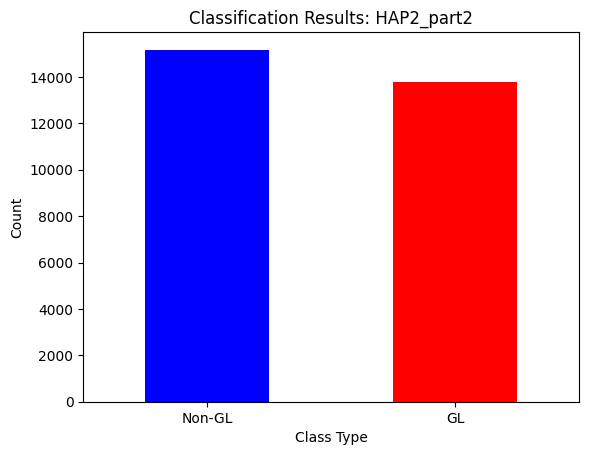

In [52]:
# Assuming 'GL' is included in 'Stage 1', 'Stage 2', and 'Stage 3'
# Filter the DataFrame to include only 'Non-GL' and 'GL'
gl_classification_results = df_HAP2_p2[df_HAP2_p2['HAP2_p2_clf'].isin(['Non-GL', 'Stage 1', 'Stage 2', 'Stage 3'])]

# Combine 'Stage 1', 'Stage 2', and 'Stage 3' into one category 'GL'
gl_classification_results.loc[gl_classification_results['HAP2_p2_clf'].isin(['Stage 1', 'Stage 2', 'Stage 3']), 'HAP2_p2_clf'] = 'GL'

# Count the occurrences of each stage
classification_counts = gl_classification_results['HAP2_p2_clf'].value_counts()

# Reorder the DataFrame based on the custom order
counts_hap2_p2 = classification_counts.reindex(['Non-GL', 'GL'])

# Display the classification results
print("Classification Results for total eyes:")
print(counts_hap2_p2)

# Plot the ordered DataFrame
counts_hap2_p2.plot(kind='bar', rot=0, color=['blue', 'red'])
plt.title('Classification Results: HAP2_part2')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

Classification Results for total eyes:
Non-GL     15172
Stage 1     8459
Stage 2     1806
Stage 3     3506
Name: HAP2_p2_clf, dtype: int64


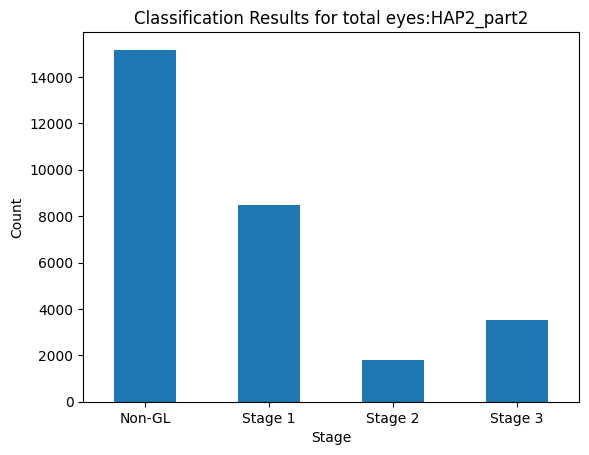

In [53]:
# 4 class classification using HAP2_part2
# Display the count of each unique value in the 'Stage' column
classification_results = df_HAP2_p2['HAP2_p2_clf'].value_counts()
stage_order = ['Non-GL', 'Stage 1', 'Stage 2', 'Stage 3']

# Reorder the DataFrame based on the custom order
classification_results_ordered = classification_results.reindex(stage_order)

# Display the classification results
print("Classification Results for total eyes:")
print(classification_results_ordered)

import matplotlib.pyplot as plt
# Visualizing


# Plot the ordered DataFrame
classification_results_ordered.plot(kind='bar', rot=0)
plt.title('Classification Results for total eyes:HAP2_part2')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

Classification Results for OD Eyes:
Non-GL     7692
Stage 1    4219
Stage 2     837
Stage 3    1685
Name: HAP2_p2_clf, dtype: int64

Classification Results for OS Eyes:
Non-GL     7480
Stage 1    4240
Stage 2     969
Stage 3    1821
Name: HAP2_p2_clf, dtype: int64


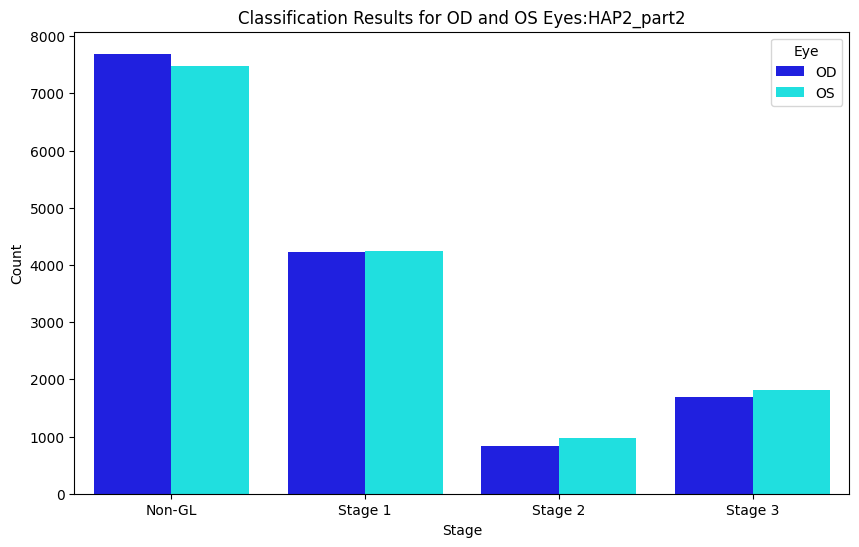

In [54]:
# Filter the DataFrame for 'OD' eyes
df_od = df_HAP2_p2[df_HAP2_p2['eye'] == 'OD']

# Filter the DataFrame for 'OS' eyes
df_os = df_HAP2_p2[df_HAP2_p2['eye'] == 'OS']
stage_order = ['Non-GL', 'Stage 1', 'Stage 2', 'Stage 3']

# Display the count of each unique value in the 'Stage' column for 'OD' eyes
classification_results_od = df_od['HAP2_p2_clf'].value_counts()
classification_results_ordered_od = classification_results_od.reindex(stage_order)

# Display the count of each unique value in the 'Stage' column for 'OS' eyes
classification_results_os = df_os['HAP2_p2_clf'].value_counts()
classification_results_ordered_os = classification_results_os.reindex(stage_order)

# Display the classification results for 'OD' eyes
print("Classification Results for OD Eyes:")
print(classification_results_ordered_od)

# Display the classification results for 'OS' eyes
print("\nClassification Results for OS Eyes:")
print(classification_results_ordered_os)

# Visualizing
# Concatenate 'OD' and 'OS' eyes into one DataFrame
df_both = pd.concat([df_od, df_os])

# Plot a bar plot with 'eye' as hue
plt.figure(figsize=(10, 6))
sns.countplot(x='HAP2_p2_clf', data=df_both, hue='eye', palette={'OD': 'blue', 'OS': 'cyan'}, order=stage_order)
plt.title('Classification Results for OD and OS Eyes:HAP2_part2')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.legend(title='Eye', loc='upper right')

# Show the plot
plt.show()

In [55]:
# save tdp and pdp into the csv file
# We need to merge these new data into the original VFs

directory_path = '/Users/musa1/OneDrive - University of Massachusetts/Desktop/VF_Harvard/'
name1 = 'TDP_data'
name2 = 'PDP_data'
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
csv_file_name1 = f'{name1}_{timestamp}.csv'
csv_file_name2 = f'{name2}_{timestamp}.csv'

csv_file_path1 = f'{directory_path}{csv_file_name1}'
csv_file_path2 = f'{directory_path}{csv_file_name2}'


df_tdp.to_csv(csv_file_path1, index=False)
df_pdp.to_csv(csv_file_path2, index=False)

## 2- UKGTS

In [56]:
def check_gl_condition(row, threshold=0.01, consecutive_reductions=2):
    # Convert values to numeric, handling errors by setting them to NaN
    numeric_values = pd.to_numeric(row.values, errors='coerce')
    below_threshold = numeric_values < threshold
    consecutive_counts = np.convolve(below_threshold, np.ones(consecutive_reductions), mode='valid')

    return np.any(consecutive_counts >= consecutive_reductions)

def Fn_UKGTS(df_UKGTS, threshold=0.01, consecutive_reductions=2):
    # Apply the condition to identify GL or Non-GL
    df_UKGTS['UKGTS_clf'] = np.where(df_UKGTS.apply(check_gl_condition, axis=1, threshold=threshold, consecutive_reductions=consecutive_reductions), 'GL', 'Non-GL')

    return df_UKGTS

# Assuming df_UKGTS is your DataFrame
df_UKGTS = Fn_UKGTS(df_UKGTS)

# Display the result
print(df_UKGTS)

         l1    l2    l3    l4    l5     l6    l7    l8     l9    l10  ...  \
1      0.95  0.95  0.95  0.95  0.95  0.950  0.05  0.95  0.950  0.950  ...   
2      0.95  0.95  0.95  0.95  0.95  0.950  0.95  0.95  0.950  0.950  ...   
3      0.95  0.05  0.95  0.95  0.95  0.950  0.95  0.95  0.950  0.950  ...   
4      0.95  0.05  0.95  0.95  0.95  0.950  0.95  0.95  0.050  0.005  ...   
5      0.95  0.95  0.95  0.95  0.95  0.950  0.95  0.95  0.050  0.950  ...   
...     ...   ...   ...   ...   ...    ...   ...   ...    ...    ...  ...   
28939  0.95  0.95  0.95  0.95  0.02  0.005  0.95  0.95  0.950  0.950  ...   
28940  0.95  0.95  0.95  0.95  0.05  0.950  0.95  0.95  0.950  0.950  ...   
28941  0.95  0.95  0.95  0.95  0.95  0.950  0.95  0.05  0.005  0.950  ...   
28942  0.95  0.95  0.95  0.95  0.95  0.950  0.95  0.95  0.050  0.950  ...   
28943  0.95  0.95  0.95  0.95  0.95  0.950  0.95  0.95  0.950  0.950  ...   

         l46    l47    l48    l49   l50   l51   l52   l53   l54  UKGTS_clf 

Non-GL     9122
GL        19821
Name: UKGTS_clf, dtype: int64


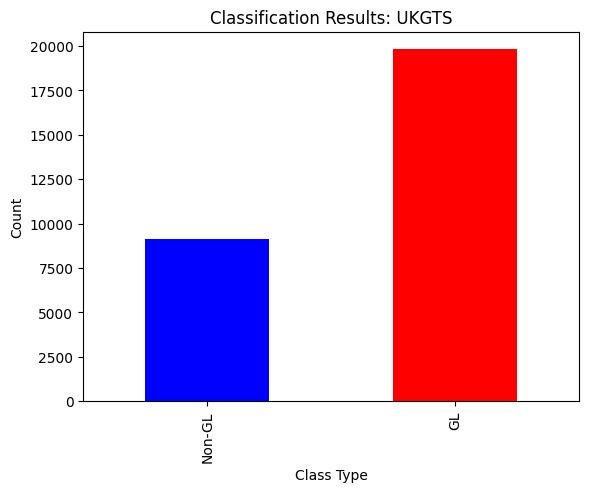

In [57]:
# Visualization UKGTS
# Count the occurrences of 'GL' and 'Non-GL'
stage_order = ['Non-GL', 'GL']

counts_ukgts = df_UKGTS['UKGTS_clf'].value_counts().reindex(stage_order)
print(counts_ukgts)

# Plot the bar plot
counts_ukgts.plot(kind='bar', color=['blue', 'red'])
plt.title('Classification Results: UKGTS')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

# 3- LoGTS

In [59]:
def LoGTS_clf(row):
    # Convert values to numeric, handling errors by setting them to NaN
    numeric_values = pd.to_numeric(row, errors='coerce')
    
    # Count values less than -10
    count_less_than_10 = (numeric_values < -10).sum()
    
    if count_less_than_10 <= 2:
        return "GL"
    else:
        return "Non-GL"

def Fn_LoGTS(df_LoGTS):
    # Add 'LoGTS_clf' column based on the LoGTS_clf function
    df_LoGTS['LoGTS_clf'] = df_LoGTS.apply(LoGTS_clf, axis=1)
    
    return df_LoGTS

# Assuming df_LoGTS is your DataFrame
df_LoGTS = Fn_LoGTS(df_LoGTS)

# Display the result
print(df_LoGTS)

             l1        l2        l3        l4        l5        l6        l7  \
1     -0.581507 -4.110465 -5.160673 -2.732129 -2.151032 -2.158742 -4.687700   
2      0.481651 -1.050339  0.900174 -0.666807 -0.087595  0.897910 -2.634080   
3     -4.455191 -5.990213 -4.038978 -3.601486  1.975842  0.954562 -1.580461   
4     -3.265716 -6.809835 -5.856437 -6.405522  1.166153 -1.875482 -2.419601   
5     -2.202558 -4.749709 -0.795590 -4.340201 -2.770410 -1.818830 -3.365981   
...         ...       ...       ...       ...       ...       ...       ...   
28939 -4.760452 -1.328826 -0.369660 -0.882953 -5.326352 -6.422267 -3.990641   
28940  2.060603  2.452813  2.421353 -5.033777 -4.501672  0.314208  1.706417   
28941 -0.813081 -0.426935 -4.456953 -5.903134 -1.374799 -1.572489 -2.186343   
28942  1.302706  1.731300 -0.308813 -0.817631  0.737085  0.634385  1.062978   
28943 -2.634136 -0.208574  1.752034  1.247690 -1.199478 -1.308963  1.116598   

             l8        l9       l10  ...       l46 

Non-GL    11853
GL        17090
Name: LoGTS_clf, dtype: int64


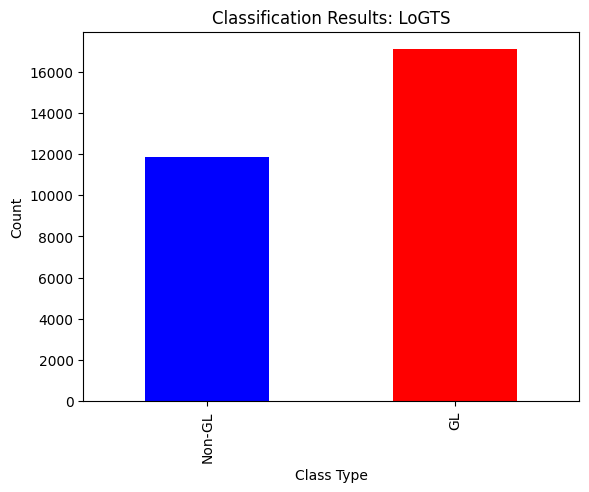

In [60]:
# Visualization LoGTS
# Count the occurrences of "GL" and "Non-GL"
stage_order = ['Non-GL', 'GL']

counts_logts = df_LoGTS['LoGTS_clf'].value_counts().reindex(stage_order)
print(counts_logts)
counts_logts.plot(kind='bar', color=['blue', 'red'])
plt.title('Classification Results: LoGTS')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

# Comparing results........ Checking agreement or disagreement.... Intraclass Correlation Coefficient (ICC) was used 

In [72]:
tot_counts = pd.DataFrame({
    'HAP2_p2_clf': counts_hap2_p2,
    'UKGTS_clf': counts_ukgts,
    'LoGTS_clf': counts_logts
})
print("Classification Results:")
print(tot_counts)

Classification Results:
        HAP2_p2_clf  UKGTS_clf  LoGTS_clf
Non-GL        15172       9122      11853
GL            13771      19821      17090


Classification results
        HAP2_p2_clf  UKGTS_clf  LoGTS_clf
Non-GL        15172       9122      11853
GL            13771      19821      17090


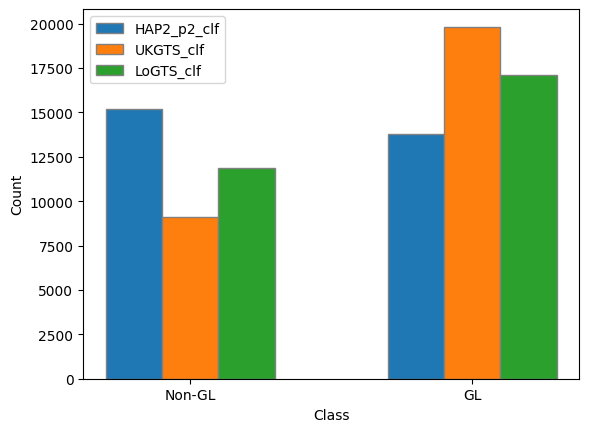

In [73]:
# Plot 3 methods in one graph
categories = ['Non-GL', 'GL']
print('Classification results')
print(tot_counts)
# Bar width
bar_width = 0.2

# Set up positions for bars on x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar plots
plt.bar(r1, counts_hap2_p2, width=bar_width, edgecolor='grey', label='HAP2_p2_clf')
plt.bar(r2, counts_ukgts, width=bar_width, edgecolor='grey', label='UKGTS_clf')
plt.bar(r3, counts_logts, width=bar_width, edgecolor='grey', label='LoGTS_clf')

# Labeling
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([r + bar_width for r in range(len(categories))], categories)

# Add legend
plt.legend()

plt.savefig('imshow_plot.png')
# Show the plot
plt.show()

In [75]:
# Check agreement/disagreement
non_gl_all=[15172, 11279, 11853]
gl_all=[13771, 17664, 17090]
non_gl_ukgts_logts=[11279, 11853]
gl_ukgts_logts=[17664, 17090]

# Combine the data into a list of arrays
data_all = [non_gl_all, gl_all]
data_ukgts_logts = [non_gl_ukgts_logts, gl_ukgts_logts]

# Perform one-way ANOVA to obtain the total variance
total_variance_all = np.var(np.concatenate(data_all))
total_variance_ukgts_logts = np.var(np.concatenate(data_ukgts_logts))


# Calculate the residual variance (within-group variance)
residual_variance_all = np.mean([np.var(arr) for arr in data_all])
residual_variance_ukgts_logts = np.mean([np.var(arr) for arr in data_ukgts_logts])


# Calculate the ICC
icc_all = (total_variance_all - residual_variance_all) / total_variance_all
icc_ukgts_logts = (total_variance_ukgts_logts - residual_variance_ukgts_logts) / total_variance_ukgts_logts


# Print the result
print(f"Intraclass Correlation Coefficient (ICC) for Three Classes: {icc_all}")
print(f"Intraclass Correlation Coefficient (ICC) Two Classes : {icc_ukgts_logts}")


Intraclass Correlation Coefficient (ICC) for Three Classes: 0.4963560330483567
Intraclass Correlation Coefficient (ICC) Two Classes : 0.9903371529337147


# Call three methods in one function

In [76]:
# Function to combine the DataFrames
def combine_dataframes(org_str, df1, df2, df3):
    # Combine the DataFrames along the columns axis
    result_combined1 = pd.concat([df1, df2], axis=1)
    
    # Reset indices to ensure proper alignment
    m1_reset = m1.reset_index(drop=True)
    
    m2_reset = result_combined1.reset_index(drop=True)
    
    # Add the specified columns from m1_reset to the first three columns of m2_reset
    m2_reset.insert(0, 'ID', m1_reset['id'])
    m2_reset.insert(1, 'Eye', m1_reset['eye'])
    m2_reset.insert(2, 'Age', m1_reset['age'])
    
    result_combined1=m2_reset
    result_combined2=result_combined1 = pd.concat([result_combined1, df3], axis=1)

    # Return the combined DataFrame
    return result_combined2

# Call the function with your DataFrames
result_combined = combine_dataframes(m1, df_UKGTS['UKGTS_clf'], df_LoGTS['LoGTS_clf'], df_HAP2_p2['HAP2_p2_clf'])

# Show the combined DataFrame
print(result_combined)

         ID Eye  Age UKGTS_clf LoGTS_clf HAP2_p2_clf
0       647  OD   53        GL        GL      Non-GL
1       647  OD   54    Non-GL        GL      Non-GL
2       647  OD   55    Non-GL        GL     Stage 1
3       647  OD   58    Non-GL        GL     Stage 1
4       647  OD   59        GL        GL     Stage 1
...     ...  ..  ...       ...       ...         ...
28938  7324  OS   66    Non-GL        GL     Stage 1
28939  6859  OD   79        GL    Non-GL      Non-GL
28940  6859  OD   81        GL    Non-GL     Stage 2
28941  1142  OS   67        GL        GL      Non-GL
28942  1142  OS   68        GL        GL      Non-GL

[28943 rows x 6 columns]


# Show the final results of each function

In [77]:
# 1- HAP2_p2 function
print("\nResult of Fn_HAP2_p2:")
print(Fn_HAP2_part2(df_HAP2_p2))
# 2- UKGTS fucntion
print("Result of Fn_UKGTS:")
print(Fn_UKGTS(df_UKGTS))
# 3- LoGTS function
print("\nResult of Fn_LoGTS:")
print(Fn_LoGTS(df_LoGTS))


Result of Fn_HAP2_p2:
         l1    l2    l3    l4     l5     l6    l7    l8    l9   l10  ...  \
0      0.95  0.95  0.95  0.95  0.950  0.950  0.95  0.95  0.95  0.95  ...   
1      0.95  0.95  0.95  0.95  0.950  0.950  0.95  0.95  0.95  0.95  ...   
2      0.95  0.05  0.95  0.95  0.950  0.950  0.95  0.95  0.95  0.95  ...   
3      0.95  0.95  0.95  0.95  0.950  0.950  0.95  0.95  0.95  0.01  ...   
4      0.95  0.95  0.95  0.95  0.950  0.950  0.95  0.95  0.95  0.95  ...   
...     ...   ...   ...   ...    ...    ...   ...   ...   ...   ...  ...   
28938  0.95  0.95  0.95  0.95  0.050  0.005  0.95  0.95  0.95  0.95  ...   
28939  0.95  0.95  0.98  0.95  0.005  0.950  0.95  0.95  0.95  0.95  ...   
28940  0.95  0.95  0.95  0.95  0.950  0.950  0.95  0.05  0.01  0.95  ...   
28941  0.95  0.95  0.95  0.95  0.950  0.950  0.98  0.95  0.95  0.95  ...   
28942  0.95  0.95  0.95  0.95  0.950  0.950  0.95  0.95  0.95  0.95  ...   

        l50   l51   l52   l53   l54        MD  eye  Count_Less_T

In [78]:
#Save classification results
# save tdp and pdp into the csv file
# We need to merge these new data into the original VFs

directory_path = '/Users/musa1/OneDrive - University of Massachusetts/Desktop/VF_Harvard/'
name1 = 'HAP2_part2_clf'
name2 = 'UKGTS_cls'
name3 = 'LoGTS_cls'
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
csv_file_name1 = f'{name1}_{timestamp}.csv'
csv_file_name2 = f'{name2}_{timestamp}.csv'
csv_file_name3 = f'{name3}_{timestamp}.csv'

csv_file_path1 = f'{directory_path}{csv_file_name1}'
csv_file_path2 = f'{directory_path}{csv_file_name2}'
csv_file_path3 = f'{directory_path}{csv_file_name3}'

Fn_HAP2_part2(df_HAP2_p2).to_csv(csv_file_path1, index=False)
Fn_UKGTS(df_UKGTS).to_csv(csv_file_path2, index=False)
Fn_LoGTS(df_LoGTS).to_csv(csv_file_path3, index=False)